<a href="https://colab.research.google.com/github/nxzK1/telecomX_Challenge/blob/desarrollo%2FLoad_%26_Analysis/TelecomX_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Diccionario de Datos

| **Nombre**               | **Descripción**                                                        |
|--------------------------|------------------------------------------------------------------------|
| `customerID`              | Número de identificación único de cada cliente                         |
| `Churn`                   | Si el cliente dejó o no la empresa.                                    |
| `gender`                  | Género (masculino o femenino).                                         |
| `SeniorCitizen`           | Cliente tiene o no una edad igual o mayor a 65 años.                   |
| `Partner`                 | Si el cliente tiene o no una pareja.                                   |
| `Dependents`              | Si el cliente tiene o no dependientes.                                 |
| `tenure`                  | Meses de contrato del cliente.                                         |
| `PhoneService`            | Suscripción al servicio telefónico.                                    |
| `MultipleLines`           | Suscripción a más de una línea telefónica.                             |
| `InternetService`         | Suscripción a un proveedor de internet.                                |
| `OnlineSecurity`          | Suscripción adicional de seguridad en línea.                           |
| `OnlineBackup`            | Suscripción adicional de respaldo en línea.                            |
| `DeviceProtection`        | Suscripción adicional de protección del dispositivo.                   |
| `TechSupport`             | Suscripción adicional de soporte técnico, menor tiempo de espera.     |
| `StreamingTV`             | Suscripción de televisión por cable.                                   |
| `StreamingMovies`         | Suscripción de streaming de películas.                                 |
| `Contract`                | Tipo de contrato.                                                      |
| `PaperlessBilling`        | Si el cliente prefiere recibir la factura en línea.                    |
| `PaymentMethod`           | Forma de pago.                                                         |
| `Charges.Monthly`         | Total de todos los servicios del cliente por mes.                      |
| `Charges.Total`           | Total gastado por el cliente.                                          |


# 📚 Librerias

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#📌 Extracción

In [2]:
url = 'https://raw.githubusercontent.com/nxzK1/telecomX_Challenge/refs/heads/main/TelecomX_Data.json'

data_JSON = json.loads(requests.get(url).text)
# data_JSON

In [3]:
data_normalizada = pd.json_normalize(data_JSON)
data_normalizada

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
data_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
data_normalizada.shape

(7267, 21)

In [6]:
data_normalizada.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

#🔧 Transformación

In [7]:
data_normalizada['account.Charges.Total'] = data_normalizada['account.Charges.Total'].map(lambda x: x.replace("' '", "").strip())
data_normalizada['account.Charges.Total'] = pd.to_numeric(data_normalizada['account.Charges.Total'], errors='coerce')
data_normalizada

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [8]:
data_normalizada.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [9]:
data_normalizada.dropna(axis=0, inplace=True)
data_normalizada

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [10]:
data_normalizada['account.Charges.Total'] = data_normalizada['account.Charges.Total'].astype(np.float64)

In [11]:
data_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [12]:
data_normalizada['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [13]:
data_normalizada['customerID'].replace("", None)
data_normalizada['customerID'].isnull().sum()

np.int64(0)

In [14]:
data_normalizada['customer.gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
data_normalizada['customer.SeniorCitizen'].unique()

array([0, 1])

In [16]:
data_normalizada['customer.Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
data_normalizada['customer.Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
data_normalizada['customer.tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42])

In [19]:
data_normalizada['phone.PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
data_normalizada['phone.MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [21]:
data_normalizada['internet.InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [22]:
data_normalizada['internet.OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
data_normalizada['internet.OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [24]:
data_normalizada['internet.DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
data_normalizada['internet.TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [26]:
data_normalizada['internet.StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [27]:
data_normalizada['internet.StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [28]:
data_normalizada['account.Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [29]:
data_normalizada['account.PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
data_normalizada['account.PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [31]:
data_normalizada.query("Churn == ''")

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [32]:
data_normalizada.replace("", None).isnull().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [33]:
data_normalizada['Churn'] = data_normalizada['Churn'].replace('', 'Unknown', regex=True)
data_normalizada.iloc[30]

,30
customerID,0047-ZHDTW
Churn,Unknown
customer.gender,Female
customer.SeniorCitizen,0
customer.Partner,No
customer.Dependents,No
customer.tenure,11
phone.PhoneService,Yes
phone.MultipleLines,Yes
internet.InternetService,Fiber optic


In [34]:
data_normalizada.query("Churn == 'Unknown'")

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,Unknown,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,Unknown,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,Unknown,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,Unknown,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,Unknown,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,Unknown,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,Unknown,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,Unknown,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,Unknown,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [35]:
data_normalizada.query('`account.Charges.Monthly` == 0')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [36]:
data_normalizada.query('`account.Charges.Total` == 0')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [37]:
data_normalizada.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [38]:
data_normalizada.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [39]:
data_normalizada.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [40]:
data_normalizada['internet.OnlineSecurity']

,internet.OnlineSecurity
0,No
1,No
2,No
3,No
4,No
...,...
7262,Yes
7263,No
7264,No
7265,Yes


In [41]:
data_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [42]:
data_normalizada['Churn'] = data_normalizada['Churn'].str.lower()
data_normalizada['customer.gender'] = data_normalizada['customer.gender'].str.lower()
data_normalizada['customer.Partner'] = data_normalizada['customer.Partner'].str.lower()
data_normalizada['customer.Dependents'] = data_normalizada['customer.Dependents'].str.lower()
data_normalizada['phone.PhoneService'] = data_normalizada['phone.PhoneService'].str.lower()
data_normalizada['phone.MultipleLines'] = data_normalizada['phone.MultipleLines'].str.lower()
data_normalizada['internet.InternetService'] = data_normalizada['internet.InternetService'].str.lower()
data_normalizada['internet.OnlineSecurity'] = data_normalizada['internet.OnlineSecurity'].str.lower()
data_normalizada['internet.OnlineBackup'] = data_normalizada['internet.OnlineBackup'].str.lower()
data_normalizada['internet.DeviceProtection'] = data_normalizada['internet.DeviceProtection'].str.lower()
data_normalizada['internet.TechSupport'] = data_normalizada['internet.TechSupport'].str.lower()
data_normalizada['internet.StreamingTV'] = data_normalizada['internet.StreamingTV'].str.lower()
data_normalizada['internet.StreamingMovies'] = data_normalizada['internet.StreamingMovies'].str.lower()
data_normalizada['account.Contract'] = data_normalizada['account.Contract'].str.lower()
data_normalizada['account.PaperlessBilling'] = data_normalizada['account.PaperlessBilling'].str.lower()
data_normalizada['account.PaymentMethod'] = data_normalizada['account.PaymentMethod'].str.lower()

In [43]:
data_normalizada['account.PaymentMethod'] = data_normalizada['account.PaymentMethod'].str.replace('\(.*?\)', '', regex=True).str.strip()
data_normalizada['account.PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card', 'bank transfer'],
      dtype=object)

In [44]:
df_limpio = data_normalizada.copy()
df_limpio.sample(15)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
2297,3198-VELRD,yes,female,0,yes,yes,3,yes,yes,fiber optic,...,no,no,no,no,yes,month-to-month,yes,bank transfer,84.75,264.85
6339,8722-NGNBH,yes,male,0,no,no,5,no,no phone service,dsl,...,no,yes,yes,no,no,month-to-month,no,mailed check,40.00,223.45
149,0238-WHBIQ,no,male,0,yes,yes,72,yes,yes,dsl,...,yes,yes,yes,yes,yes,two year,no,credit card,89.70,6339.30
4024,5504-WSIUR,no,female,0,no,no,70,yes,yes,fiber optic,...,yes,yes,yes,no,no,one year,yes,bank transfer,90.25,6385.95
2293,3195-TQDZX,no,male,0,no,no,3,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,yes,electronic check,20.25,61.45
401,0575-CUQOV,no,male,1,yes,no,60,yes,no,fiber optic,...,yes,yes,no,yes,yes,one year,yes,electronic check,97.95,5867.00
5165,7048-GXDAY,no,male,0,no,no,39,yes,yes,fiber optic,...,yes,no,no,yes,yes,month-to-month,yes,electronic check,106.40,4040.65
7266,9995-HOTOH,no,male,0,yes,yes,63,no,no phone service,dsl,...,yes,yes,no,yes,yes,two year,no,electronic check,59.00,3707.60
3574,4925-LMHOK,yes,male,0,no,no,15,yes,yes,dsl,...,yes,no,yes,no,no,month-to-month,yes,credit card,58.60,939.70
3455,4791-QRGMF,yes,male,0,yes,no,59,yes,yes,fiber optic,...,no,yes,no,yes,yes,one year,yes,bank transfer,99.50,5961.10


In [45]:
df_limpio.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [46]:
df_limpio.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [47]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [48]:
df_limpio.query('Churn == "unknown"')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,unknown,female,0,no,no,11,yes,yes,fiber optic,...,no,no,no,no,no,month-to-month,yes,bank transfer,79.00,929.30
75,0120-YZLQA,unknown,male,0,no,no,71,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,yes,credit card,19.90,1355.10
96,0154-QYHJU,unknown,male,0,no,no,29,yes,no,dsl,...,yes,no,yes,no,no,one year,yes,electronic check,58.75,1696.20
98,0162-RZGMZ,unknown,female,1,no,no,5,yes,no,dsl,...,yes,no,yes,no,no,month-to-month,no,credit card,59.90,287.85
175,0274-VVQOQ,unknown,male,1,yes,no,65,yes,yes,fiber optic,...,yes,yes,no,yes,yes,one year,yes,bank transfer,103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,unknown,female,0,no,no,14,yes,yes,dsl,...,yes,no,no,no,no,one year,yes,mailed check,54.25,773.20
7180,9872-RZQQB,unknown,female,0,yes,no,49,no,no phone service,dsl,...,no,no,no,yes,no,month-to-month,no,bank transfer,40.65,2070.75
7211,9920-GNDMB,unknown,male,0,no,no,9,yes,yes,fiber optic,...,no,no,no,no,no,month-to-month,yes,electronic check,76.25,684.85
7239,9955-RVWSC,unknown,female,0,yes,yes,67,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,yes,bank transfer,19.25,1372.90


In [49]:
df_limpio['Cuentas_Diarias'] = round(df_limpio['account.Charges.Monthly'] / 30, 2)
df_limpio

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.46
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.84
7263,9992-RRAMN,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.68
7265,9993-LHIEB,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.26


In [50]:
df_limpio = df_limpio.rename({'customerID': 'ID_Cliente', 'Churn': 'Cancelacion_servicios' ,'customer.gender': 'Genero', 'customer.SeniorCitizen': 'Adulto_mayor',
                              'customer.Partner': 'Conyuge', 'customer.Dependents': 'Con_dependientes', 'customer.tenure': 'Meses_contrato', 'phone.PhoneService': 'Servicio_movil',
                              'phone.MultipleLines': 'MultiLinea', 'internet.InternetService': 'Servicio_Internet', 'internet.OnlineSecurity': 'Seguridad_Online',
                              'internet.OnlineBackup': 'Respaldo_Online', 'internet.DeviceProtection': 'Proteccion_dispositivo', 'internet.TechSupport': 'Soporte_tecnico',
                              'internet.StreamingTV': 'Transmision_TV', 'internet.StreamingMovies': 'Transmision_peliculas', 'account.Contract': 'Tipo_contrato',
                              'account.PaperlessBilling': 'Factura_electronica', 'account.PaymentMethod': 'Metodo_pago', 'account.Charges.Monthly': 'Factura_mensual',
                              'account.Charges.Total': 'Facturacion_total'}, axis=1)

In [51]:
df_limpio

,ID_Cliente,Cancelacion_servicios,Genero,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,MultiLinea,Servicio_Internet,...,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Tipo_contrato,Factura_electronica,Metodo_pago,Factura_mensual,Facturacion_total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.46
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.84
7263,9992-RRAMN,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.68
7265,9993-LHIEB,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.26


In [52]:
df_limpio['Cancelacion_servicios'] = df_limpio['Cancelacion_servicios'].replace('unknown', 'no', regex=True)
df_limpio.iloc[30]

,30
ID_Cliente,0047-ZHDTW
Cancelacion_servicios,no
Genero,female
Adulto_mayor,0
Conyuge,no
Con_dependientes,no
Meses_contrato,11
Servicio_movil,yes
MultiLinea,yes
Servicio_Internet,fiber optic


In [53]:
df_limpio['Conyuge'] = df_limpio['Conyuge'].replace({'yes': 1, 'no': 0}).infer_objects(copy=False).astype(np.int64)
df_limpio['Adulto_mayor'] = df_limpio['Adulto_mayor'].replace({'yes': 1, 'no': 0}).infer_objects(copy=False).astype(np.int64)
df_limpio[['Servicio_movil', 'Con_dependientes', 'Factura_electronica']] = df_limpio[['Servicio_movil', 'Con_dependientes', 'Factura_electronica']].replace({'yes': 1, 'no': 0}).infer_objects(copy=False).astype(np.int64)
df_limpio['Cancelacion_servicios'] = df_limpio['Cancelacion_servicios'].replace({'yes': 1, 'no': 0}).infer_objects(copy=False).astype(np.int64)

<ipython-input-53-695495682>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpio['Conyuge'] = df_limpio['Conyuge'].replace({'yes': 1, 'no': 0}).infer_objects(copy=False).astype(np.int64)
<ipython-input-53-695495682>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpio[['Servicio_movil', 'Con_dependientes', 'Factura_electronica']] = df_limpio[['Servicio_movil', 'Con_dependientes', 'Factura_electronica']].replace({'yes': 1, 'no': 0}).infer_objects(copy=False).astype(np.int64)
<ipython-input-53-695495682>:4: FutureWarnin

In [54]:
df_limpio.head(10)

,ID_Cliente,Cancelacion_servicios,Genero,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,MultiLinea,Servicio_Internet,...,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Tipo_contrato,Factura_electronica,Metodo_pago,Factura_mensual,Facturacion_total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.90,267.40,2.80
5,0013-MHZWF,0,female,0,0,1,9,1,no,dsl,...,no,yes,yes,yes,month-to-month,1,credit card,69.40,571.45,2.31
6,0013-SMEOE,0,female,1,1,0,71,1,no,fiber optic,...,yes,yes,yes,yes,two year,1,bank transfer,109.70,7904.25,3.66
7,0014-BMAQU,0,male,0,1,0,63,1,yes,fiber optic,...,no,yes,no,no,two year,1,credit card,84.65,5377.80,2.82
8,0015-UOCOJ,0,female,1,0,0,7,1,no,dsl,...,no,no,no,no,month-to-month,1,electronic check,48.20,340.35,1.61
9,0016-QLJIS,0,female,0,1,1,65,1,yes,dsl,...,yes,yes,yes,yes,two year,1,mailed check,90.45,5957.90,3.02


In [55]:
columnas = list(df_limpio.columns)
columnas

['ID_Cliente',
 'Cancelacion_servicios',
 'Genero',
 'Adulto_mayor',
 'Conyuge',
 'Con_dependientes',
 'Meses_contrato',
 'Servicio_movil',
 'MultiLinea',
 'Servicio_Internet',
 'Seguridad_Online',
 'Respaldo_Online',
 'Proteccion_dispositivo',
 'Soporte_tecnico',
 'Transmision_TV',
 'Transmision_peliculas',
 'Tipo_contrato',
 'Factura_electronica',
 'Metodo_pago',
 'Factura_mensual',
 'Facturacion_total',
 'Cuentas_Diarias']

In [56]:
df_limpio['Genero'] = df_limpio['Genero'].str.replace('female', 'femenino', regex=False).str.replace('male', 'masculino', regex=False).str.strip()
df_limpio['MultiLinea'] = df_limpio['MultiLinea'].str.replace('yes', 'si', regex=False).str.replace('no phone service', 'sin servicio movil', regex=False).str.strip()
df_limpio['Servicio_Internet'] = df_limpio['Servicio_Internet'].str.replace('fiber optic', 'fibra optica', regex=False).str.strip()

for values in columnas[10:16]:
    df_limpio[values] = df_limpio[values].str.replace('no internet service', 'sin servicio internet', regex=False).str.replace('yes', 'si', regex=False).str.strip()

df_limpio['Tipo_contrato'] = df_limpio['Tipo_contrato'].str.replace('month-to-month', 'mes a mes', regex=False).str.replace('two year', 'dos años', regex=False)\
.str.replace('one year', 'un año', regex=False).str.strip()

df_limpio['Metodo_pago'] = df_limpio['Metodo_pago'].str.replace('bank transfer', 'transferencia bancaria', regex=False).str.replace('electronic check', 'cheque electronico', regex=False)\
.str.replace('mailed check', 'cheque fisico', regex=False).str.replace('credit card', 'tarjeta de credito', regex=False).str.strip()

df_limpio.sample(10)

,ID_Cliente,Cancelacion_servicios,Genero,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,MultiLinea,Servicio_Internet,...,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Tipo_contrato,Factura_electronica,Metodo_pago,Factura_mensual,Facturacion_total,Cuentas_Diarias
422,0607-MVMGC,0,masculino,0,1,1,45,1,si,dsl,...,si,no,si,si,un año,0,tarjeta de credito,78.75,3600.65,2.62
3752,5158-RIVOP,0,femenino,0,1,1,11,1,no,no,...,sin servicio internet,sin servicio internet,sin servicio internet,sin servicio internet,dos años,0,tarjeta de credito,20.90,202.30,0.70
1350,1951-IEYXM,0,masculino,0,1,1,72,1,si,dsl,...,si,si,si,si,dos años,1,tarjeta de credito,90.60,6441.85,3.02
2348,3274-NSDWE,0,femenino,0,0,0,68,1,no,no,...,sin servicio internet,sin servicio internet,sin servicio internet,sin servicio internet,dos años,0,tarjeta de credito,19.60,1441.65,0.65
2786,3865-QBWSJ,0,masculino,1,0,1,38,1,si,fibra optica,...,no,no,no,no,mes a mes,1,cheque fisico,80.45,3162.65,2.68
5210,7112-OPOTK,1,masculino,0,0,0,33,1,no,fibra optica,...,no,no,no,no,mes a mes,0,cheque electronico,68.25,2171.15,2.28
3977,5442-PPTJY,0,masculino,0,1,1,12,1,no,no,...,sin servicio internet,sin servicio internet,sin servicio internet,sin servicio internet,dos años,0,cheque fisico,19.70,258.35,0.66
6251,8605-ITULD,0,femenino,0,0,0,1,1,no,no,...,sin servicio internet,sin servicio internet,sin servicio internet,sin servicio internet,mes a mes,0,cheque fisico,19.55,19.55,0.65
726,1041-RXHRA,1,femenino,0,0,0,41,1,no,fibra optica,...,no,no,no,no,mes a mes,0,transferencia bancaria,70.25,2868.05,2.34
3973,5440-FLBQG,1,masculino,1,1,0,69,1,si,fibra optica,...,si,si,si,si,dos años,1,transferencia bancaria,108.40,7318.20,3.61


In [57]:
df_limpio.sample(10)

,ID_Cliente,Cancelacion_servicios,Genero,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,MultiLinea,Servicio_Internet,...,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Tipo_contrato,Factura_electronica,Metodo_pago,Factura_mensual,Facturacion_total,Cuentas_Diarias
6815,9396-ZSFLL,0,femenino,0,0,0,15,1,si,dsl,...,no,no,no,no,mes a mes,0,cheque fisico,48.85,631.40,1.63
1202,1722-LDZJS,0,masculino,0,1,1,53,1,no,no,...,sin servicio internet,sin servicio internet,sin servicio internet,sin servicio internet,un año,0,tarjeta de credito,20.20,1068.15,0.67
3333,4636-OLWOE,0,masculino,0,0,1,54,1,no,dsl,...,si,si,no,no,un año,1,cheque electronico,61.00,3283.05,2.03
1110,1568-LJSZU,0,masculino,0,1,1,68,1,si,dsl,...,si,si,si,si,dos años,1,tarjeta de credito,92.20,6392.85,3.07
3159,4403-BWPAY,0,masculino,0,0,0,14,1,si,no,...,sin servicio internet,sin servicio internet,sin servicio internet,sin servicio internet,un año,1,tarjeta de credito,24.80,321.70,0.83
3172,4430-UZIPO,1,masculino,0,0,0,3,0,sin servicio movil,dsl,...,no,si,no,no,mes a mes,1,cheque fisico,36.85,108.70,1.23
435,0621-HJWXJ,0,femenino,0,1,0,63,1,si,fibra optica,...,no,no,no,no,mes a mes,1,transferencia bancaria,81.55,5029.05,2.72
1114,1574-DYCWE,0,femenino,0,1,1,51,1,no,no,...,sin servicio internet,sin servicio internet,sin servicio internet,sin servicio internet,dos años,0,cheque fisico,19.95,1028.75,0.66
2504,3498-LZGQZ,0,masculino,0,1,1,63,1,no,no,...,sin servicio internet,sin servicio internet,sin servicio internet,sin servicio internet,dos años,1,cheque fisico,19.15,1177.05,0.64
6311,8679-LZBMD,0,masculino,0,1,0,44,1,no,fibra optica,...,no,no,si,si,un año,1,transferencia bancaria,90.65,3974.15,3.02


In [58]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7256 non-null   object 
 1   Cancelacion_servicios   7256 non-null   int64  
 2   Genero                  7256 non-null   object 
 3   Adulto_mayor            7256 non-null   int64  
 4   Conyuge                 7256 non-null   int64  
 5   Con_dependientes        7256 non-null   int64  
 6   Meses_contrato          7256 non-null   int64  
 7   Servicio_movil          7256 non-null   int64  
 8   MultiLinea              7256 non-null   object 
 9   Servicio_Internet       7256 non-null   object 
 10  Seguridad_Online        7256 non-null   object 
 11  Respaldo_Online         7256 non-null   object 
 12  Proteccion_dispositivo  7256 non-null   object 
 13  Soporte_tecnico         7256 non-null   object 
 14  Transmision_TV          7256 non-null   objec

# 📊 Carga y análisis

In [59]:
df_limpio.describe()

,Cancelacion_servicios,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,Factura_electronica,Factura_mensual,Facturacion_total,Cuentas_Diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158467
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004282
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.180000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [60]:
Adultos_mayores = df_limpio[df_limpio['Adulto_mayor'] == 1]
No_adultos_mayores = df_limpio[df_limpio['Adulto_mayor'] == 0]

print(f"Total de clientes > 65 años: {len(Adultos_mayores)}")
print(Adultos_mayores['Cancelacion_servicios'].value_counts())

print(f"Total de clientes > 65 años: {len(No_adultos_mayores)}")
print(No_adultos_mayores['Cancelacion_servicios'].value_counts())

Total de clientes > 65 años: 1182
Cancelacion_servicios
0    706
1    476
Name: count, dtype: int64
Total de clientes > 65 años: 6074
Cancelacion_servicios
0    4681
1    1393
Name: count, dtype: int64


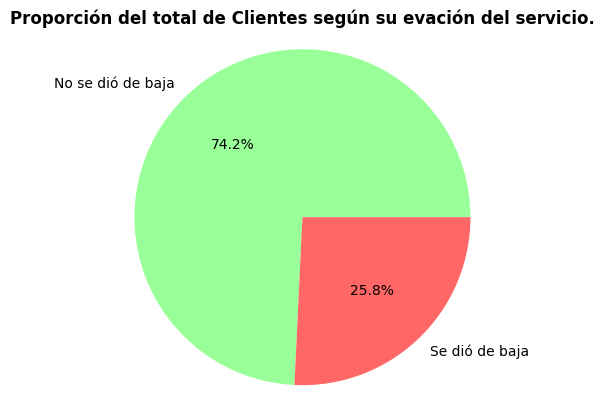

In [61]:
conteo_evación = df_limpio['Cancelacion_servicios'].value_counts()
etiquetas = ['No se dió de baja', 'Se dió de baja']
colores = ['#99ff99', '#ff6666']

fig, ax = plt.subplots()
ax.pie(conteo_evación, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=360)
ax.set_title('Proporción del total de Clientes según su evación del servicio.', fontsize=12, fontweight='bold')
plt.axis('equal')
plt.show()

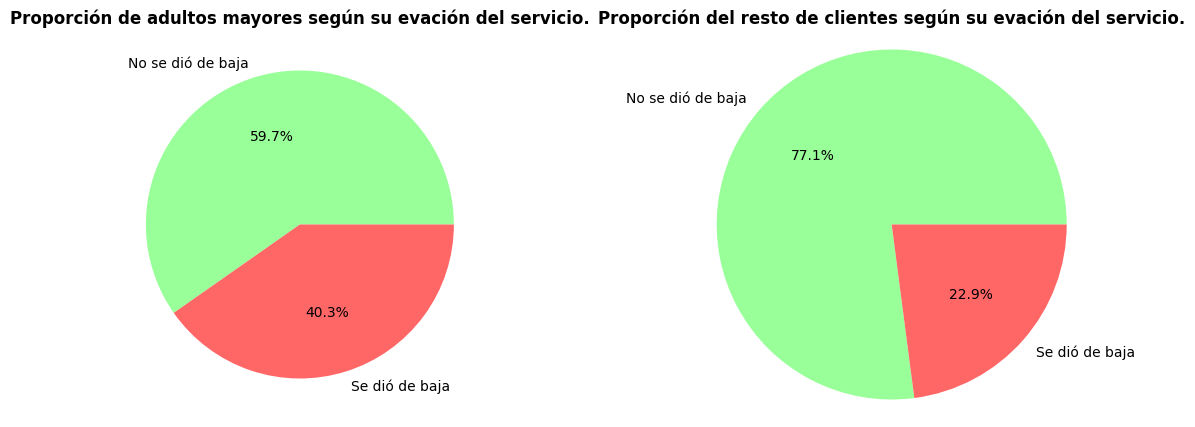

In [62]:
conteo_evación_adultos_mayores = Adultos_mayores['Cancelacion_servicios'].value_counts()
conteo_evación_no_adultos_mayores = No_adultos_mayores['Cancelacion_servicios'].value_counts()
etiquetas = ['No se dió de baja', 'Se dió de baja']
colores = ['#99ff99', '#ff6666']

fig, axs = plt.subplots(1,2,figsize=(14,5))
axs[0].pie(conteo_evación_adultos_mayores, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=360)
axs[0].set_title('Proporción de adultos mayores según su evación del servicio.', fontsize=12, fontweight='bold')

axs[1].pie(conteo_evación_no_adultos_mayores, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=360)
axs[1].set_title('Proporción del resto de clientes según su evación del servicio.', fontsize=12, fontweight='bold')
plt.axis('equal')
plt.show()

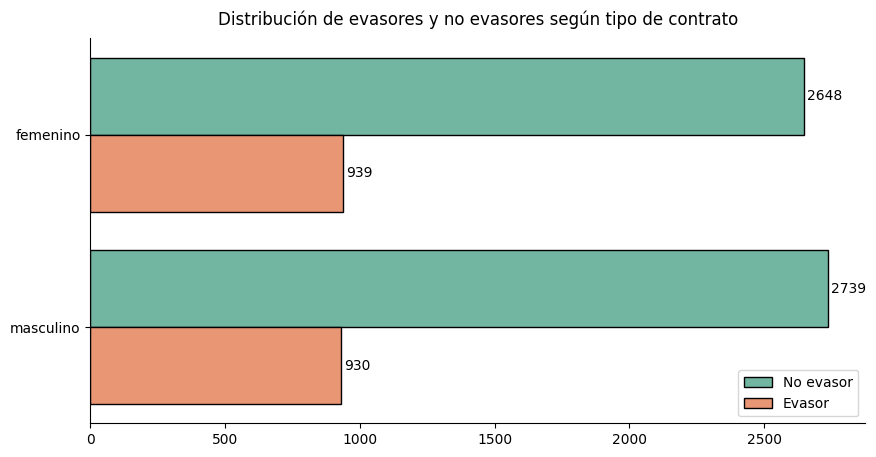

In [63]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_limpio, y='Genero', hue='Cancelacion_servicios', palette='Set2',
                   edgecolor='black', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No evasor', 'Evasor'], loc='lower right')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
sns.despine(top=True, right=True)
plt.title('Distribución de evasores y no evasores según tipo de contrato', pad=10)
plt.ylabel('')
plt.xlabel('')
plt.show()

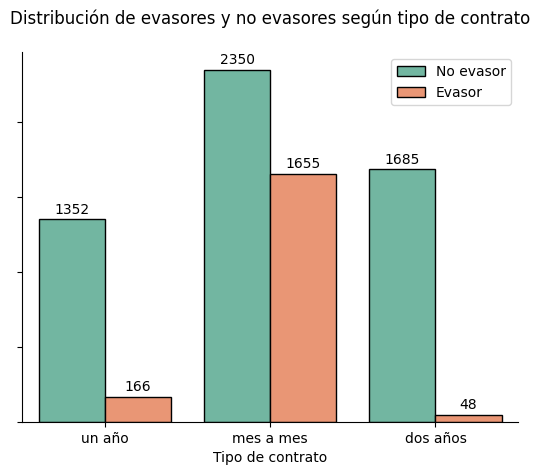

In [67]:
ax = sns.countplot(data=df_limpio, x='Tipo_contrato', hue='Cancelacion_servicios', palette='Set2',
                   edgecolor='black', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No evasor', 'Evasor'])

ax.set_yticklabels('')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
sns.despine(top=True, right=True)
plt.title('Distribución de evasores y no evasores según tipo de contrato', pad=20)
plt.ylabel('')
plt.xlabel('Tipo de contrato')
plt.show()

<ipython-input-65-1042047094>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_limpio, x='Cancelacion_servicios', y='Meses_contrato', palette='Set2', inner='quart')


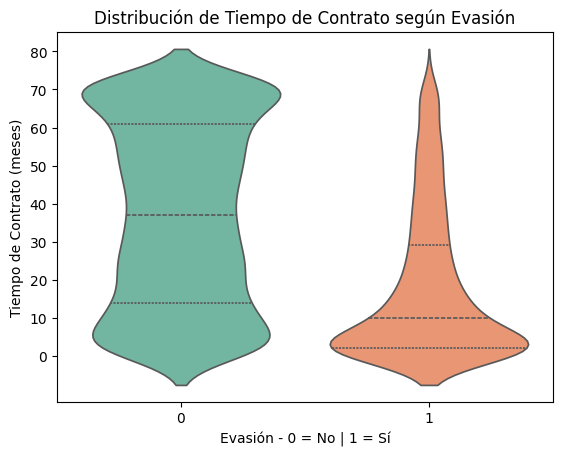

In [65]:
ax = sns.violinplot(data=df_limpio, x='Cancelacion_servicios', y='Meses_contrato', palette='Set2', inner='quart')
ax.set_yticks(range(0, 90, 10))
plt.title('Distribución de Tiempo de Contrato según Evasión')
plt.xlabel('Evasión - 0 = No | 1 = Sí')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

<ipython-input-66-3604271987>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_limpio, x='Cancelacion_servicios', y='Facturacion_total', palette='Set2', inner='quart')


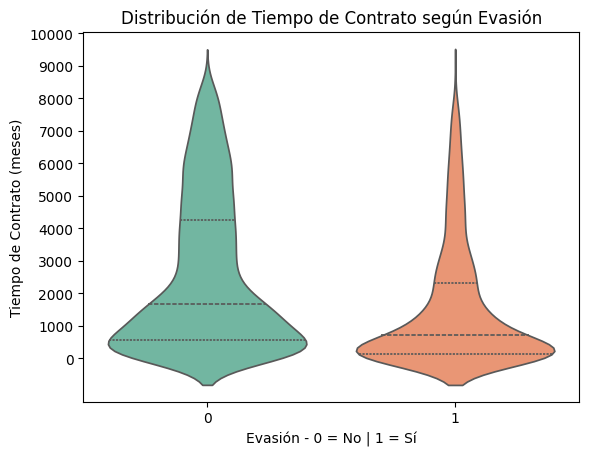

In [66]:
ax = sns.violinplot(data=df_limpio, x='Cancelacion_servicios', y='Facturacion_total', palette='Set2', inner='quart')
ax.set_yticks(range(0, 10001, 1000))
plt.title('Distribución de Tiempo de Contrato según Evasión')
plt.xlabel('Evasión - 0 = No | 1 = Sí')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

# 📄Informe final